<a href="https://colab.research.google.com/github/justin95214/logistic/blob/main/yogurt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 데이터 다운로드 받기

In [ ]:
!git clone https://github.com/justin95214/logistic.git

Cloning into 'logistic'...
remote: Enumerating objects: 18, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 18 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (18/18), done.


2. 필요한 라이브러리 import 하기


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime

import pandas as pd
#import seaborn as sns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

3. 다운로드 받은 경로에서 데이터 읽기

In [ ]:

df= pd.read_csv("/content/logistic/yogurt.csv")

print(df.head(10), df.info)

        Date  Level
0   2010.1.1     57
1   2010.2.1     49
2   2010.3.1     64
3   2010.4.1     51
4   2010.5.1     59
5   2010.6.1     52
6   2010.7.1     36
7   2010.8.1     36
8   2010.9.1     32
9  2010.10.1     45 <bound method DataFrame.info of           Date  Level
0     2010.1.1     57
1     2010.2.1     49
2     2010.3.1     64
3     2010.4.1     51
4     2010.5.1     59
..         ...    ...
103   2018.8.1     24
104   2018.9.1     24
105  2018.10.1     33
106  2018.11.1     56
107  2018.12.1     45

[108 rows x 2 columns]>


4. 크기가 50인 사이즈의 윈도우 생성하기 50개씩 읽고 다음 날짜 데이터 예측


4-1 10개 항목중에 3번째 항목 예측해보기

In [ ]:

data = df['Level'].values
seq_len = 12
sequence_length = seq_len + 1

result = []
for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])


result

[array([57, 49, 64, 51, 59, 52, 36, 36, 32, 45, 73, 63, 45]),
 array([49, 64, 51, 59, 52, 36, 36, 32, 45, 73, 63, 45, 72]),
 array([64, 51, 59, 52, 36, 36, 32, 45, 73, 63, 45, 72, 65]),
 array([51, 59, 52, 36, 36, 32, 45, 73, 63, 45, 72, 65, 59]),
 array([59, 52, 36, 36, 32, 45, 73, 63, 45, 72, 65, 59, 75]),
 array([52, 36, 36, 32, 45, 73, 63, 45, 72, 65, 59, 75, 49]),
 array([36, 36, 32, 45, 73, 63, 45, 72, 65, 59, 75, 49, 34]),
 array([36, 32, 45, 73, 63, 45, 72, 65, 59, 75, 49, 34, 32]),
 array([32, 45, 73, 63, 45, 72, 65, 59, 75, 49, 34, 32, 33]),
 array([45, 73, 63, 45, 72, 65, 59, 75, 49, 34, 32, 33, 46]),
 array([73, 63, 45, 72, 65, 59, 75, 49, 34, 32, 33, 46, 46]),
 array([63, 45, 72, 65, 59, 75, 49, 34, 32, 33, 46, 46, 50]),
 array([45, 72, 65, 59, 75, 49, 34, 32, 33, 46, 46, 50, 57]),
 array([72, 65, 59, 75, 49, 34, 32, 33, 46, 46, 50, 57, 51]),
 array([65, 59, 75, 49, 34, 32, 33, 46, 46, 50, 57, 51, 51]),
 array([59, 75, 49, 34, 32, 33, 46, 46, 50, 57, 51, 51, 54]),
 array([

In [ ]:

df['Level'],df.columns[-1]

data = df[['Level',df.columns[-1]]].values

seq_len = 12
sequence_length = seq_len + 1

result_a = []
for index in range(len(data) - sequence_length):
        result_a.append(data[index: index + sequence_length])


In [ ]:
result= []
for k in result_a:
        result.append(list(map(lambda x: x[0], k)))

result

[[57, 49, 64, 51, 59, 52, 36, 36, 32, 45, 73, 63, 45],
 [49, 64, 51, 59, 52, 36, 36, 32, 45, 73, 63, 45, 72],
 [64, 51, 59, 52, 36, 36, 32, 45, 73, 63, 45, 72, 65],
 [51, 59, 52, 36, 36, 32, 45, 73, 63, 45, 72, 65, 59],
 [59, 52, 36, 36, 32, 45, 73, 63, 45, 72, 65, 59, 75],
 [52, 36, 36, 32, 45, 73, 63, 45, 72, 65, 59, 75, 49],
 [36, 36, 32, 45, 73, 63, 45, 72, 65, 59, 75, 49, 34],
 [36, 32, 45, 73, 63, 45, 72, 65, 59, 75, 49, 34, 32],
 [32, 45, 73, 63, 45, 72, 65, 59, 75, 49, 34, 32, 33],
 [45, 73, 63, 45, 72, 65, 59, 75, 49, 34, 32, 33, 46],
 [73, 63, 45, 72, 65, 59, 75, 49, 34, 32, 33, 46, 46],
 [63, 45, 72, 65, 59, 75, 49, 34, 32, 33, 46, 46, 50],
 [45, 72, 65, 59, 75, 49, 34, 32, 33, 46, 46, 50, 57],
 [72, 65, 59, 75, 49, 34, 32, 33, 46, 46, 50, 57, 51],
 [65, 59, 75, 49, 34, 32, 33, 46, 46, 50, 57, 51, 51],
 [59, 75, 49, 34, 32, 33, 46, 46, 50, 57, 51, 51, 54],
 [75, 49, 34, 32, 33, 46, 46, 50, 57, 51, 51, 54, 58],
 [49, 34, 32, 33, 46, 46, 50, 57, 51, 51, 54, 58, 41],
 [34, 32, 

5. 항목별로 판매량 MinMaxScale하기 6. 데이터 분할하기 50 개 읽고 1개 예측 

In [ ]:
normalized_data = []
#( X- (X의 최솟값) ) / ( X의 최댓값 - X의 최솟값 )
min_max_value_list = []

for window in result:
    normalized_window = [(p-min(window)) / (max(window) - min(window)) for p in window]
    min_max_value_list.append([min(window), max(window)])
    normalized_data.append(normalized_window)

result = np.array(normalized_data)
print(result)
print(result.shape)

# split train and test data
#row = int(round(result.shape[0] * 0.9))
row = -36
row1 = -24


train = result[:row, :]


np.random.shuffle(train)
x_train = train[:, :-1]
print(x_train.shape)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row1:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row1:, -1]


####
train_standard = min_max_value_list[:row]
test_standard = min_max_value_list[row1:]

print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)
print(len(train_standard), len(test_standard))

[[0.6097561  0.41463415 0.7804878  ... 1.         0.75609756 0.31707317]
 [0.41463415 0.7804878  0.46341463 ... 0.75609756 0.31707317 0.97560976]
 [0.7804878  0.46341463 0.65853659 ... 0.31707317 0.97560976 0.80487805]
 ...
 [0.40625    0.28125    0.75       ... 0.125      0.         0.        ]
 [0.28125    0.75       0.71875    ... 0.         0.         0.28125   ]
 [0.75       0.71875    0.8125     ... 0.         0.28125    1.        ]]
(95, 13)
(59, 12)
(59, 12, 1) (59,) (24, 12, 1) (24,)
59 24


7. 모델링에 필요한 라이브러리 import하기

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import SimpleRNN, Input, Dense, LSTM
from tensorflow.keras.layers import Bidirectional, TimeDistributed

8. 모델학습

In [ ]:
# 학습
model = Sequential()
model.add(SimpleRNN(72, return_sequences=True, input_shape=(seq_len, 1)))
model.add(SimpleRNN(120, return_sequences=True))
model.add(SimpleRNN(60, return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

model.summary()
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=5,
    epochs=200)




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 12, 72)            5328      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 12, 120)           23160     
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 60)                10860     
                                                                 
 dense (Dense)               (None, 1)                 61        
                                                                 
Total params: 39,409
Trainable params: 39,409
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
12/12 [==============================] - 3s 53ms/step - loss: 0.8152 - val_loss: 0.1094
Epoch 2/200
12/12 [==============================] - 0s 14ms/step - loss: 0.1698 - v

[50.980927, 57.406593, 51.343216, 62.391808, 55.570625, 56.58934, 38.606037, 34.014175, 33.165955, 27.548904, 30.375095, 46.433624, 41.759903, 53.60833, 55.9455, 58.344234, 49.277706, 55.075607, 39.352146, 28.225546, 27.115837, 25.422586, 31.484617, 38.495358] [48.0, 52.0, 47.0, 59.0, 57.0, 62.0, 42.0, 35.0, 26.0, 37.0, 33.0, 48.0, 47.0, 50.0, 52.0, 49.0, 56.0, 43.0, 38.0, 28.0, 24.0, 24.0, 33.0, 56.0]


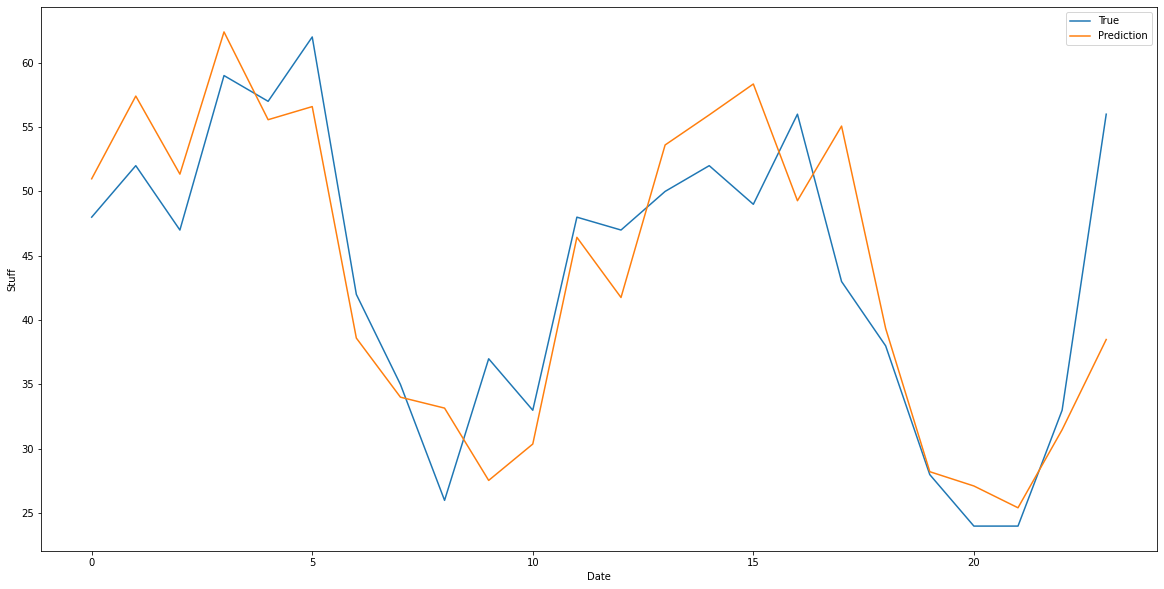

In [ ]:
import matplotlib.dates as mdates
pred = model.predict(x_test)


denormalized_data= [(p*(s[1] - s[0])+s[0])[0] for p, s in zip(pred, test_standard)]
denormalized_answer= [p*(s[1] - s[0])+s[0] for p,s in zip(y_test, test_standard)]

print(denormalized_data, denormalized_answer)
#denormalized_data.append(denormalized_window)






fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(denormalized_answer, label='True')
ax.plot(denormalized_data, label='Prediction')
ax.set_xlabel('Date')
ax.set_ylabel('Stuff')
dateFmt = mdates.DateFormatter('%Y-%m-%d')
ax.legend()
plt.show()

10. 예측값과 실제값 차이 계산

 MAE (Mean Absolute Error) - 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
 https://ichi.pro/ko/chucheon-siseutem-eul-pyeong-gahaneun-bangbeob-ui-jeonche-moglog-183670080086494

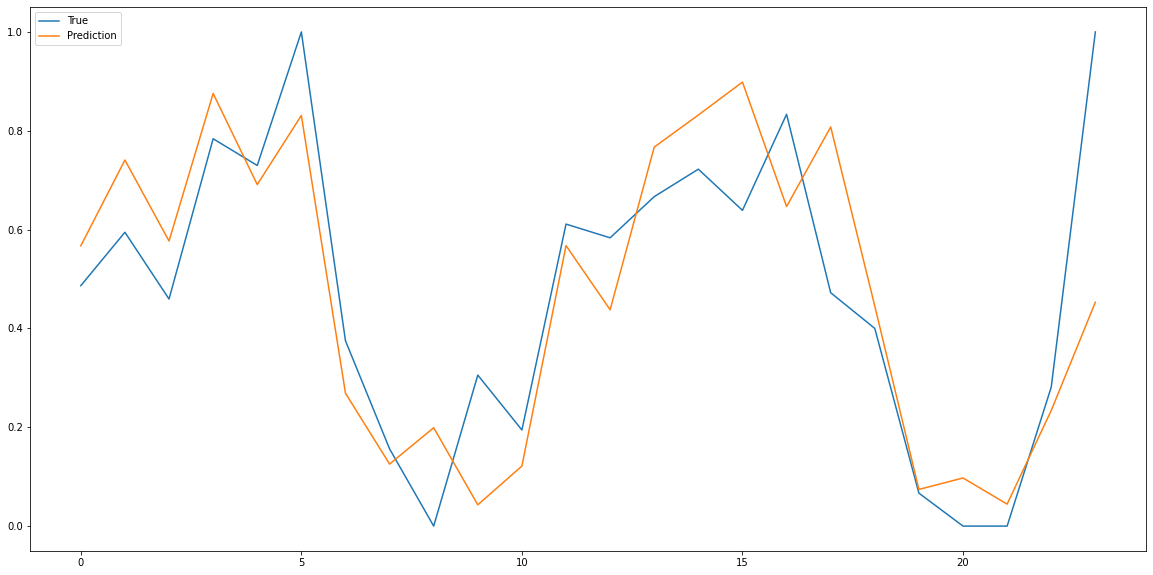

In [ ]:
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
print(denormalized_data)
mean_absolute_error(denormalized_answer, denormalized_data)


[50.980927, 57.406593, 51.343216, 62.391808, 55.570625, 56.58934, 38.606037, 34.014175, 33.165955, 27.548904, 30.375095, 46.433624, 41.759903, 53.60833, 55.9455, 58.344234, 49.277706, 55.075607, 39.352146, 28.225546, 27.115837, 25.422586, 31.484617, 38.495358]


4.759287436803182

In [ ]:
csv_data = [[a,d] for a,d in zip(denormalized_answer, denormalized_data)]
temp_df = pd.DataFrame(csv_data, columns=["answer","predict"])
temp_df.to_csv("/content/logistic/result.csv")